# Estimation on simulated data using MSM

In [53]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import time
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
SMD.load_est('single')

{'alpha_0_male': 0.48704889,
 'alpha_0_female': 0.50153614,
 'alpha_1': -0.16117956,
 'sigma_eta': 0.267018}

### Identification of phi across gender?

In [ ]:
Couple = RetirementClass(couple=True, simT=68-53+1)
Couple.solve()
Couple.simulate()

In [ ]:
est_par = ["alpha_0_male", "alpha_0_female", "phi_0_male", "phi_0_female"]
par_save = est_par[2:]
par_latex = ['$\phi_0^m$', '$\phi_0^f$']

In [ ]:
true_par = [0.5, 0.5, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,par_latex,start=[1,1],
                   end=[2,2],N=10).savefig('figs/Estimation/Identification1.png')

In [ ]:
true_par = [0.6, 0.2, 1.1, 1.6]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,par_latex,start=[1,1],
                   end=[2,2],N=10).savefig('figs/Estimation/Identification2.png')

### Simulate data

In [2]:
Couple = RetirementClass(couple=True, simN=int(1e6), simT=68-53+1)
Couple.solve()
Couple.simulate()

In [3]:
mom_data = SMD.MomFunCouple_agg(Couple)
boot = SMD.MomFunCouple_agg(Couple,bootstrap=True,B=200)

In [4]:
Omega = np.cov(boot.T)
weight = 1/np.sqrt(np.diag(Omega))
factor = np.ones(len(weight))
#factor[-9:] = 8
weight = weight*factor
W = np.eye(weight.size)*weight

### Set up estimation

In [5]:
Couple.par.simN = int(1e5)
Couple.par.sim_seed = Couple.par.sim_seed + 100 # set new seed
Couple.solve(recompute=True)

In [6]:
# function to generate moments
def mom_fun(Couple):
    return SMD.MomFunCouple_agg(Couple)

In [17]:
par = Couple.par

#true = np.array([par.alpha_0_male, par.alpha_0_female, par.phi_0_male, par.phi_1])
#est_par = ["alpha_0_male", "alpha_0_female", "phi_0_male", "phi_1"]

true = np.array([par.alpha_0_male, par.alpha_0_female, par.sigma_eta, par.phi_0_male])
est_par = ["alpha_0_male", "alpha_0_female", "sigma_eta", "phi_0_male"]

#true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta, par.phi_0_male, par.phi_1])
#true = [par.alpha_0_male, par.alpha_0_female, par.phi_0_male]
#est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta", "phi_0_male", "phi_1"]
#est_par = ["alpha_0_male", "alpha_0_female", "phi_0_male"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun)
smd.est_par = est_par

In [18]:
print('true par :', true)
print('obj(true):', smd.obj_fun(true,W))

true par : [0.4   0.2   0.435 1.   ]
obj(true): 0.0010661291981227507


In [19]:
Nobs = 1000
smd.std_error(true,Omega,W,Nobs=Nobs,Nsim=Couple.par.simN/Nobs)

In [22]:
true

array([0.4  , 0.2  , 0.435, 1.   ])

In [24]:
np.round(smd.std,3)

array([0.018, 0.018, 0.013, 0.022])

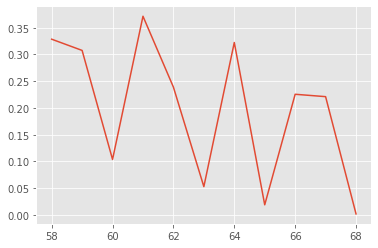

In [50]:
plt.plot(np.arange(58,69),abs(smd.sens1[0,11:22]))

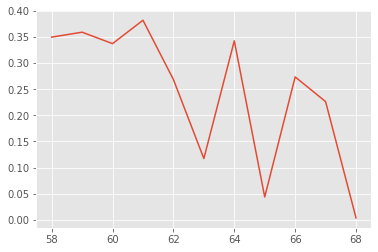

In [51]:
plt.plot(np.arange(58,69),abs(smd.sens1[1,11:22]))

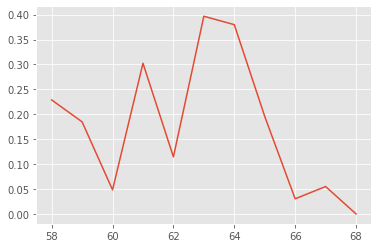

In [52]:
plt.plot(np.arange(58,69),abs(smd.sens1[3,11:22]))

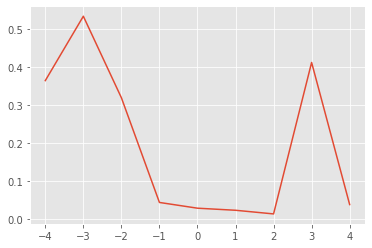

In [41]:
plt.plot(np.arange(-4,5),abs(smd.sens1[1,-9:]))

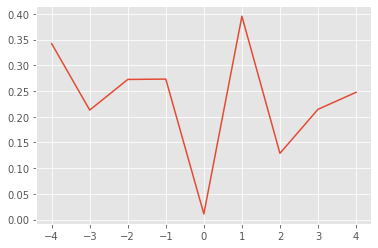

In [42]:
plt.plot(np.arange(-4,5),abs(smd.sens1[3,-9:]))

In [26]:
smd.sens1.shape

(4, 31)

### Estimate

In [ ]:
#theta0 = SMD.start(4,bounds=[(0,1), (0,1), (-1,1), (0.2,0.8), (0,2), (-1,1)])
#theta0 = SMD.start(4,bounds=[(0.0,1.0), (0.0,1.0), (0.0,2.0)])
#theta0[0] = list(true)
#theta0 = SMD.start(4,bounds=[(0.2,0.4), (0.4,0.6), (0.0,0.3), (0.3,0.5), (1.2,1.4), (-1,-0.5)])
theta0 = SMD.start(4,bounds=[(0.3,0.5), (0.1,0.3), (0.1,0.3), (1.2,1.4)])
#theta0 = SMD.start(4,bounds=[(0.2,0.4), (0.4,0.6), (1.2,1.4), (-1,-0.5)])

In [ ]:
theta0

[[0.329, 0.148, 0.25, 1.242],
 [0.43, 0.119, 0.135, 1.24],
 [0.402, 0.224, 0.163, 1.253],
 [0.414, 0.179, 0.181, 1.202]]

In [ ]:
smd.print_iter = [True,10]
smd.MultiStart(theta0,W)
theta = smd.est

Iteration: 10 (2.33 minutes)
 alpha_0_male=0.3542 alpha_0_female=0.1482 alpha_1=0.2457 phi_0_male=1.3371 -> 0.7168
Iteration: 20 (2.52 minutes)
 alpha_0_male=0.4008 alpha_0_female=0.1607 alpha_1=0.2118 phi_0_male=1.4619 -> 0.2305
Iteration: 30 (2.49 minutes)
 alpha_0_male=0.3975 alpha_0_female=0.1547 alpha_1=0.1884 phi_0_male=1.5438 -> 0.2398
Iteration: 40 (2.26 minutes)
 alpha_0_male=0.3875 alpha_0_female=0.1558 alpha_1=0.2127 phi_0_male=1.4362 -> 0.1064
Iteration: 50 (2.28 minutes)
 alpha_0_male=0.3924 alpha_0_female=0.1638 alpha_1=0.1814 phi_0_male=1.4486 -> 0.0473
Iteration: 60 (2.34 minutes)
 alpha_0_male=0.3897 alpha_0_female=0.1716 alpha_1=0.1768 phi_0_male=1.4367 -> 0.0393
Iteration: 70 (2.27 minutes)
 alpha_0_male=0.3778 alpha_0_female=0.1940 alpha_1=0.1891 phi_0_male=1.3925 -> 0.0244
Iteration: 80 (2.27 minutes)
 alpha_0_male=0.3836 alpha_0_female=0.1950 alpha_1=0.1802 phi_0_male=1.3933 -> 0.0209
Iteration: 90 (2.3 minutes)
 alpha_0_male=0.3820 alpha_0_female=0.1976 alpha_1=0

In [ ]:
smd.print_iter = [True,10]
smd.MultiStart(theta0,W)
theta = smd.est

Iteration: 10 (2.32 minutes)
 alpha_0_male=0.3542 alpha_0_female=0.1482 alpha_1=0.2457 phi_0_male=1.3371 -> 1.2824
Iteration: 20 (2.36 minutes)
 alpha_0_male=0.4008 alpha_0_female=0.1607 alpha_1=0.2118 phi_0_male=1.4619 -> 0.5007
Iteration: 30 (2.35 minutes)
 alpha_0_male=0.3945 alpha_0_female=0.1520 alpha_1=0.2020 phi_0_male=1.4832 -> 0.2840
Iteration: 40 (2.33 minutes)
 alpha_0_male=0.3944 alpha_0_female=0.1588 alpha_1=0.1870 phi_0_male=1.4403 -> 0.1333
Iteration: 50 (2.28 minutes)
 alpha_0_male=0.3988 alpha_0_female=0.1603 alpha_1=0.1648 phi_0_male=1.4645 -> 0.1260
Iteration: 60 (2.22 minutes)
 alpha_0_male=0.4006 alpha_0_female=0.1739 alpha_1=0.1763 phi_0_male=1.3689 -> 0.1020
Iteration: 70 (2.27 minutes)
 alpha_0_male=0.4007 alpha_0_female=0.1786 alpha_1=0.1840 phi_0_male=1.3590 -> 0.0839
Iteration: 80 (2.33 minutes)
 alpha_0_male=0.4053 alpha_0_female=0.1900 alpha_1=0.1941 phi_0_male=1.3040 -> 0.0735
Iteration: 90 (2.28 minutes)
 alpha_0_male=0.4094 alpha_0_female=0.1978 alpha_1=

In [139]:
smd.print_iter = [True,10]
smd.MultiStart(theta0,W)
theta = smd.est

Iteration: 150 (11.64 minutes)
 alpha_0_male=0.4018 alpha_0_female=0.2993 alpha_1=0.2562 phi_0_male=1.1419 -> 0.5608
Iteration: 160 (2.46 minutes)
 alpha_0_male=0.4031 alpha_0_female=0.2973 alpha_1=0.2655 phi_0_male=1.0426 -> 0.1931
Iteration: 170 (2.48 minutes)
 alpha_0_male=0.4147 alpha_0_female=0.2622 alpha_1=0.2663 phi_0_male=1.0217 -> 0.0912
Iteration: 180 (2.44 minutes)
 alpha_0_male=0.4285 alpha_0_female=0.2133 alpha_1=0.2172 phi_0_male=1.1641 -> 0.0207
Iteration: 190 (2.36 minutes)
 alpha_0_male=0.4408 alpha_0_female=0.1838 alpha_1=0.2035 phi_0_male=1.2046 -> 0.0465
Iteration: 200 (2.3 minutes)
 alpha_0_male=0.4098 alpha_0_female=0.2103 alpha_1=0.2138 phi_0_male=1.2154 -> 0.0191
Iteration: 210 (2.34 minutes)
 alpha_0_male=0.4176 alpha_0_female=0.2161 alpha_1=0.2128 phi_0_male=1.1904 -> 0.0174
Iteration: 220 (2.48 minutes)
 alpha_0_male=0.3940 alpha_0_female=0.2039 alpha_1=0.2004 phi_0_male=1.2909 -> 0.0175
Iteration: 230 (2.4 minutes)
 alpha_0_male=0.4031 alpha_0_female=0.2094 

KeyboardInterrupt: 

In [ ]:
print('par       :', est_par)
print('bias (abs):', np.round(true-theta,2))
print('bias (pct):', np.round((true/theta-1)*100,2))

In [30]:
smd.print_iter = [True,50]
smd.MultiStart(theta0,weight)
theta = smd.est

Iteration: 50 (10.93 minutes)
 alpha_0_male=0.2639 alpha_0_female=0.5043 phi_0_male=1.4106 phi_1=-0.6701 -> 0.0016
Iteration: 100 (10.9 minutes)
 alpha_0_male=0.3009 alpha_0_female=0.5002 phi_0_male=1.2977 phi_1=-0.6145 -> 0.0012
1 estimation:
success: True | feval: 110 | time: 24.0 min | obj: 0.0011988176943883726
start par: [0.229, 0.448, 1.35, -0.895]
par:       [ 0.30045551  0.5000841   1.29935598 -0.61502811]

Iteration: 150 (10.92 minutes)
 alpha_0_male=0.2983 alpha_0_female=0.4562 phi_0_male=1.4419 phi_1=-0.7345 -> 0.0023
Iteration: 200 (11.01 minutes)
 alpha_0_male=0.2830 alpha_0_female=0.4903 phi_0_male=1.4132 phi_1=-0.7126 -> 0.0015
2 estimation:
success: True | feval: 118 | time: 25.8 min | obj: 0.001412896240744003
start par: [0.33, 0.419, 1.235, -0.901]
par:       [ 0.28505652  0.49004033  1.40887759 -0.71423321]

Iteration: 250 (10.92 minutes)
 alpha_0_male=0.3138 alpha_0_female=0.4827 phi_0_male=1.3667 phi_1=-0.7200 -> 0.0019
Iteration: 300 (10.91 minutes)
 alpha_0_male=

In [24]:
smd.print_iter = [True,25]
smd.MultiStart(theta0,weight)
theta = smd.est

Iteration: 25 (6.64 minutes)
 alpha_0_male=0.2529 alpha_0_female=0.5104 alpha_1=0.0668 phi_0_male=1.3806 -> 0.0024
Iteration: 50 (5.94 minutes)
 alpha_0_male=0.2597 alpha_0_female=0.4856 alpha_1=0.0491 phi_0_male=1.4284 -> 0.0018
Iteration: 75 (5.98 minutes)
 alpha_0_male=0.2645 alpha_0_female=0.5093 alpha_1=0.0506 phi_0_male=1.3754 -> 0.0016
1 estimation:
success: True | feval: 95 | time: 22.1 min | obj: 0.0015012680469484677
start par: [0.229, 0.448, 0.075, 1.242]
par:       [0.26579546 0.50810433 0.04833442 1.37703183]

Iteration: 100 (5.56 minutes)
 alpha_0_male=0.3300 alpha_0_female=0.4190 alpha_1=0.0180 phi_0_male=1.3020 -> 0.0186
Iteration: 125 (5.48 minutes)
 alpha_0_male=0.3328 alpha_0_female=0.5096 alpha_1=0.0152 phi_0_male=1.2335 -> 0.0046
Iteration: 150 (5.41 minutes)
 alpha_0_male=0.3265 alpha_0_female=0.5133 alpha_1=0.0159 phi_0_male=1.2971 -> 0.0030
Iteration: 175 (5.42 minutes)
 alpha_0_male=0.3234 alpha_0_female=0.5097 alpha_1=0.0162 phi_0_male=1.3019 -> 0.0028
Iterati

In [10]:
smd.print_iter = [True,50]
smd.MultiStart(theta0,weight)
theta = smd.est

Iteration: 50 (13.25 minutes)
 alpha_0_male=0.3005 alpha_0_female=0.4994 alpha_1=0.0560 sigma_eta=0.4339 phi_0_male=1.3019 phi_1=-0.6209 -> 0.0013
1 estimation:
success: True | feval: 90 | time: 21.7 min | obj: 0.00122043456363263
start par: [0.3, 0.5, 0.053, 0.435, 1.3, -0.621]
par:       [ 0.30062253  0.50120288  0.05537883  0.43501476  1.29918494 -0.62772129]

Iteration: 100 (11.98 minutes)
 alpha_0_male=0.1814 alpha_0_female=0.2029 alpha_1=0.0246 sigma_eta=0.5482 phi_0_male=0.6498 phi_1=-0.4505 -> 1.0189
Iteration: 150 (11.37 minutes)
 alpha_0_male=0.3007 alpha_0_female=0.2970 alpha_1=0.0205 sigma_eta=0.2892 phi_0_male=0.9753 phi_1=0.0805 -> 0.0899
Iteration: 200 (11.84 minutes)
 alpha_0_male=0.3095 alpha_0_female=0.3799 alpha_1=0.0149 sigma_eta=0.3802 phi_0_male=0.9859 phi_1=0.2153 -> 0.0427
Iteration: 250 (11.43 minutes)
 alpha_0_male=0.4069 alpha_0_female=0.5892 alpha_1=-0.0360 sigma_eta=0.4115 phi_0_male=0.9564 phi_1=-0.3890 -> 0.0078
Iteration: 300 (11.41 minutes)
 alpha_0_mal

In [31]:
print('par       :', est_par)
print('bias (abs):', np.round(true-theta,2))
print('bias (pct):', np.round((true/theta-1)*100,2))

par       : ['alpha_0_male', 'alpha_0_female', 'phi_0_male', 'phi_1']
bias (abs): [-0.01  0.    0.    0.  ]
bias (pct): [-2.29  1.    0.32 -0.79]


In [25]:
print('par       :', est_par)
print('bias (abs):', np.round(true-theta,2))
print('bias (pct):', np.round((true/theta-1)*100,2))

par       : ['alpha_0_male', 'alpha_0_female', 'alpha_1', 'phi_0_male']
bias (abs): [ 0.01  0.    0.01 -0.03]
bias (pct): [ 2.25  0.86 12.41 -2.47]


In [11]:
print('par       :', est_par)
print('bias (abs):', np.round(true-theta,2))
print('bias (pct):', np.round((true/theta-1)*100,2))

par       : ['alpha_0_male', 'alpha_0_female', 'alpha_1', 'sigma_eta', 'phi_0_male', 'phi_1']
bias (abs): [ 0.    0.   -0.    0.   -0.    0.01]
bias (pct): [ 0.19  0.3  -5.82  0.02 -0.35 -1.28]
